# Importing Data & Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import *

clubs_df = pd.read_csv(f"{folder_path}/clubs.csv")

# Data Preparation of Clubs

In [2]:
clubs_df.shape

(426, 16)

In [3]:
clubs_df.head(10)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...
5,157,kaa-gent,Koninklijke Atletiek Associatie Gent,BE1,NaN,25,25.7,13,52.0,8,Ghelamco Arena,19999,+€2.52m,NaN,2023,https://www.transfermarkt.co.uk/kaa-gent/start...
6,1894,hvidovre-if,Hvidovre Idrætsforening,DK1,NaN,30,27.1,4,13.3,2,PRO VENTILATION Arena,12000,+€335k,NaN,2023,https://www.transfermarkt.co.uk/hvidovre-if/st...
7,190,fc-kopenhagen,Football Club København,DK1,NaN,28,25.4,14,50.0,8,Parken,38065,+€9.63m,NaN,2023,https://www.transfermarkt.co.uk/fc-kopenhagen/...
8,192,roda-jc-kerkrade,Roda JC Kerkrade,NL1,NaN,25,24.0,9,36.0,0,Parkstad Limburg Stadion,19979,+€1.30m,NaN,2017,https://www.transfermarkt.co.uk/roda-jc-kerkra...
9,19789,yeni-malatyaspor,Yeni Malatyaspor,TR1,NaN,10,22.9,1,10.0,0,Yeni Malatya Stadyumu,25745,+€778k,NaN,2021,https://www.transfermarkt.co.uk/yeni-malatyasp...


In [4]:
clubs_df.columns

Index(['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season',
       'url'],
      dtype='object')

In [5]:
# handling NA values
clubs_df.isna().sum()

# le colonne total_market_value e coach_name sono completamente NA

club_id                      0
club_code                    0
name                         0
domestic_competition_id      0
total_market_value         426
squad_size                   0
average_age                 38
foreigners_number            0
foreigners_percentage       47
national_team_players        0
stadium_name                 0
stadium_seats                0
net_transfer_record          0
coach_name                 426
last_season                  0
url                          0
dtype: int64

In [6]:
# renaming columns
clubs_df = clubs_df.rename(columns={
    'name':'club_name',
    'domestic_competition_id':'league_id',
    'current_club_id':'club_id'
})

clubs_df

,club_id,club_code,club_name,league_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,Football Club Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


In [7]:
# removing columns with only NA values
clubs_df.drop(columns=['coach_name','total_market_value'], inplace=True)

# setting NA values of average_age to a medium value
clubs_df.loc[clubs_df['average_age'].isna(), 'average_age'] = clubs_df['average_age'].mean()

# removing clubs with zero players
clubs_df = clubs_df[clubs_df['squad_size'] != 0]

# setting NA values of foreigners_percentage to foreigners_number/squad_size
clubs_df.loc[clubs_df['foreigners_percentage'].isna(), 'foreigners_percentage'] = (clubs_df['foreigners_number']/clubs_df['squad_size'])*100


clubs_df.isna().sum()

club_id                  0
club_code                0
club_name                0
league_id                0
squad_size               0
average_age              0
foreigners_number        0
foreigners_percentage    0
national_team_players    0
stadium_name             0
stadium_seats            0
net_transfer_record      0
last_season              0
url                      0
dtype: int64

In [8]:
# checking duplicates
clubs_df.loc[clubs_df.duplicated()]

,club_id,club_code,club_name,league_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,url


In [9]:
clubs_df.dtypes
# no need to change any data type

club_id                    int64
club_code                 object
club_name                 object
league_id                 object
squad_size                 int64
average_age              float64
foreigners_number          int64
foreigners_percentage    float64
national_team_players      int64
stadium_name              object
stadium_seats              int64
net_transfer_record       object
last_season                int64
url                       object
dtype: object

In [10]:
# using other dataframes to add columns coach_name and total_market_value
players_df = pd.read_csv(f"{folder_path}/players.csv")
games_df = pd.read_csv(f"{folder_path}/games.csv")


current_players = players_df.query('last_season == 2023')

# calcolo VDM squadre
teams_market_value = current_players.groupby('current_club_id')['market_value_in_eur'].sum().reset_index()
teams_market_value.rename(columns={'current_club_id': 'club_id'}, inplace=True)


# aggiornamento dataframe (total market value)

# per evitare di riaggiungere colonne ogni volta che si riesegue
if 'market_value_in_eur' in clubs_df.columns:
    clubs_df.drop(columns=['market_value_in_eur'], inplace=True)
if 'total_market_value_mln' in clubs_df.columns:
    clubs_df.drop(columns=['total_market_value_mln'], inplace=True)

clubs_df = clubs_df.merge(teams_market_value, on='club_id', how='left')
clubs_df['total_market_value_mln'] = clubs_df['market_value_in_eur'] / 1e6


# partite di questa stagione (per ottenere allenatori attuali)
current_season_games = games_df.query('season == 2023')
current_season_games = current_season_games.sort_values(by='date', ascending=False)

latest_coaches = current_season_games.groupby('home_club_id')['home_club_manager_name'].first().reset_index()
latest_coaches.rename(columns={'home_club_manager_name': 'coach_name', 'home_club_id': 'club_id'}, inplace=True)


# aggiornamento dataframe (coach)
if 'coach_name' in clubs_df.columns:
    clubs_df.drop(columns=['coach_name'], inplace=True)

clubs_df = clubs_df.merge(latest_coaches, on='club_id', how='left')



clubs_df

,club_id,club_code,club_name,league_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,url,market_value_in_eur,total_market_value_mln,coach_name
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...,32800000.0,32.800,Torsten Lieberknecht
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...,19850000.0,19.850,Viktor Goncharenko
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,2023,https://www.transfermarkt.co.uk/besiktas-istan...,129775000.0,129.775,Rıza Çalımbay
3,12,as-rom,Associazione Sportiva Roma,IT1,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,2023,https://www.transfermarkt.co.uk/as-rom/startse...,362150000.0,362.150,José Mourinho
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,2023,https://www.transfermarkt.co.uk/tottenham-hots...,747600000.0,747.600,Ange Postecoglou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,68608,cf-os-belenenses,CF Os Belenenses,PO1,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,2017,https://www.transfermarkt.co.uk/cf-os-belenens...,NaN,NaN,Bruno Dias
384,724,fc-volendam,Football Club Volendam,NL1,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,2023,https://www.transfermarkt.co.uk/fc-volendam/st...,11225000.0,11.225,Matthias Kohler
385,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,2023,https://www.transfermarkt.co.uk/atalanta-berga...,324600000.0,324.600,Gian Piero Gasperini
386,979,moreirense-fc,Moreirense Futebol Clube,PO1,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,2023,https://www.transfermarkt.co.uk/moreirense-fc/...,16550000.0,16.550,Rui Borges


In [11]:
# adding the column club_name from players

if 'full_club_name' not in clubs_df.columns:
    if 'club_name' in clubs_df.columns:
        clubs_df.rename(columns={'club_name': 'full_club_name'}, inplace=True)

# Code by ChatGPT
club_name_mapping = players_df.groupby('current_club_id')['current_club_name'].first().to_dict()

if 'club_name' in clubs_df.columns:
    clubs_df.drop(columns=['club_name'], inplace=True)

clubs_df['club_name'] = clubs_df['club_id'].map(club_name_mapping)

clubs_df

,club_id,club_code,full_club_name,league_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,url,market_value_in_eur,total_market_value_mln,coach_name,club_name
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...,32800000.0,32.800,Torsten Lieberknecht,SV Darmstadt 98
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...,19850000.0,19.850,Viktor Goncharenko,Ural Yekaterinburg
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,2023,https://www.transfermarkt.co.uk/besiktas-istan...,129775000.0,129.775,Rıza Çalımbay,Besiktas JK
3,12,as-rom,Associazione Sportiva Roma,IT1,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,2023,https://www.transfermarkt.co.uk/as-rom/startse...,362150000.0,362.150,José Mourinho,AS Roma
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,2023,https://www.transfermarkt.co.uk/tottenham-hots...,747600000.0,747.600,Ange Postecoglou,Tottenham Hotspur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,68608,cf-os-belenenses,CF Os Belenenses,PO1,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,2017,https://www.transfermarkt.co.uk/cf-os-belenens...,NaN,NaN,Bruno Dias,CF Os Belenenses
384,724,fc-volendam,Football Club Volendam,NL1,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,2023,https://www.transfermarkt.co.uk/fc-volendam/st...,11225000.0,11.225,Matthias Kohler,FC Volendam
385,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,2023,https://www.transfermarkt.co.uk/atalanta-berga...,324600000.0,324.600,Gian Piero Gasperini,Atalanta BC
386,979,moreirense-fc,Moreirense Futebol Clube,PO1,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,2023,https://www.transfermarkt.co.uk/moreirense-fc/...,16550000.0,16.550,Rui Borges,Moreirense FC


In [12]:
clubs_df['squad_size'].describe()

count    388.000000
mean      26.793814
std        4.602411
min        3.000000
25%       25.000000
50%       27.000000
75%       29.000000
max       41.000000
Name: squad_size, dtype: float64

In [13]:
clubs_df['average_age'].describe()

count    388.000000
mean      25.704639
std        1.596598
min       18.300000
25%       24.700000
50%       25.700000
75%       26.900000
max       29.700000
Name: average_age, dtype: float64

In [14]:
clubs_df['foreigners_number'].describe()

count    388.000000
mean      12.059278
std        6.056930
min        0.000000
25%        8.000000
50%       12.500000
75%       16.000000
max       31.000000
Name: foreigners_number, dtype: float64

In [15]:
clubs_df['national_team_players'].describe()

count    388.000000
mean       5.257732
std        5.089440
min        0.000000
25%        1.000000
50%        4.000000
75%        8.000000
max       22.000000
Name: national_team_players, dtype: float64

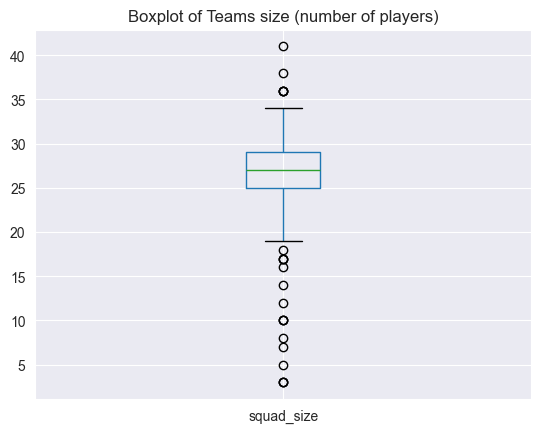

In [16]:
# check for squad size outliers
ax = clubs_df.boxplot(column='squad_size')
ax.set_title('Boxplot of Teams size (number of players)')
plt.show()

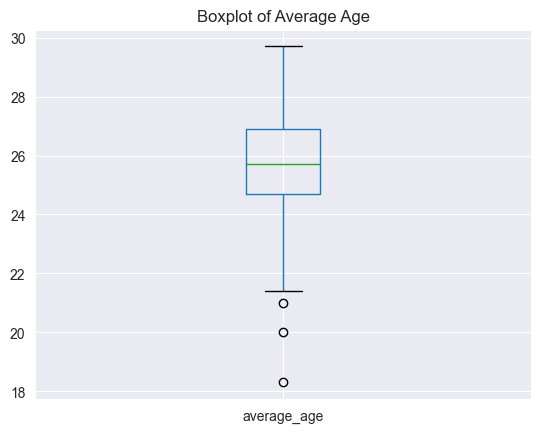

In [17]:
# check for average age outliers
ax = clubs_df.boxplot(column='average_age')
ax.set_title('Boxplot of Average Age')
plt.show()

In [18]:
# selecting only 2023 teams
current_teams = clubs_df.query('last_season == 2023')

Media di squad_size: 27.57


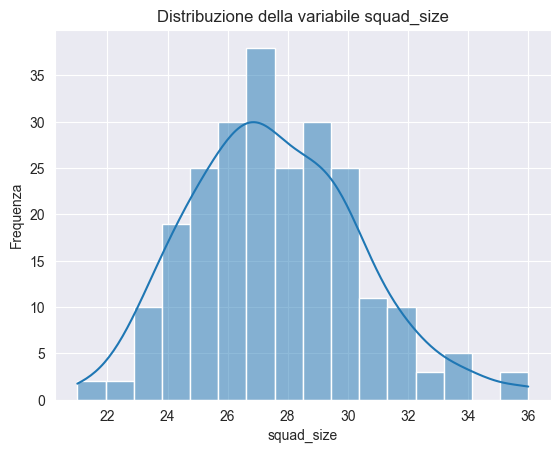

In [19]:
df = current_teams
var = 'squad_size'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

Media di average_age: 26.08


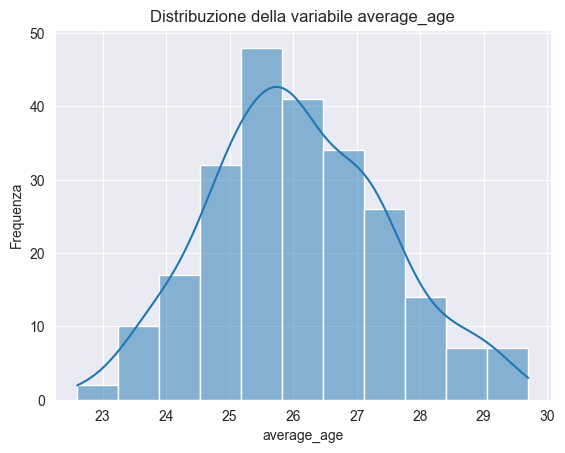

In [20]:
df = current_teams
var = 'average_age'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

Media di foreigners_percentage: 51.53 %


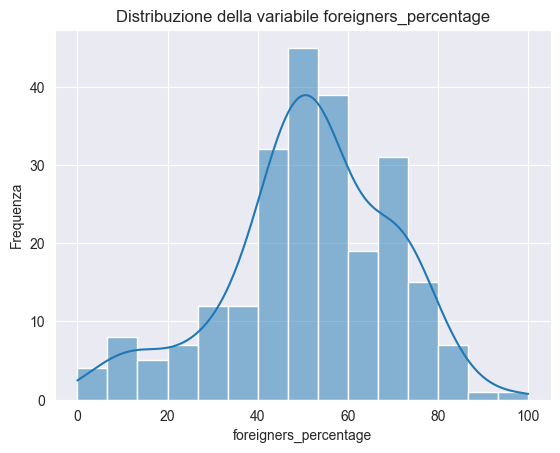

In [21]:
df = current_teams
var = 'foreigners_percentage'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f} %")

sns.histplot(data=df, x=var, kde=True)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

Media di national_team_players: 7.18


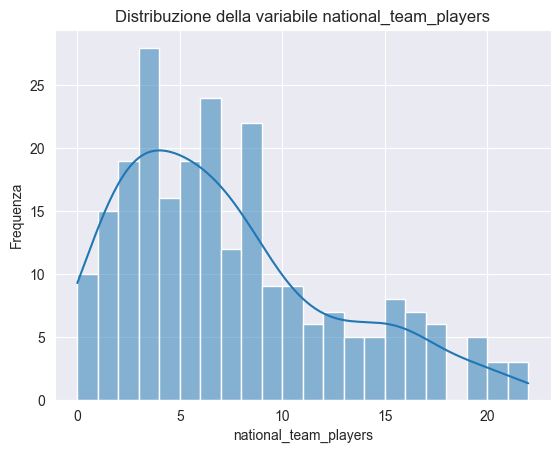

In [22]:
df = current_teams
var = 'national_team_players'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True, bins=22)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

In [23]:
# multivariate analysis (correlation)
current_teams[['foreigners_number','foreigners_percentage']].corr()

,foreigners_number,foreigners_percentage
foreigners_number,1.000000,0.955476
foreigners_percentage,0.955476,1.000000


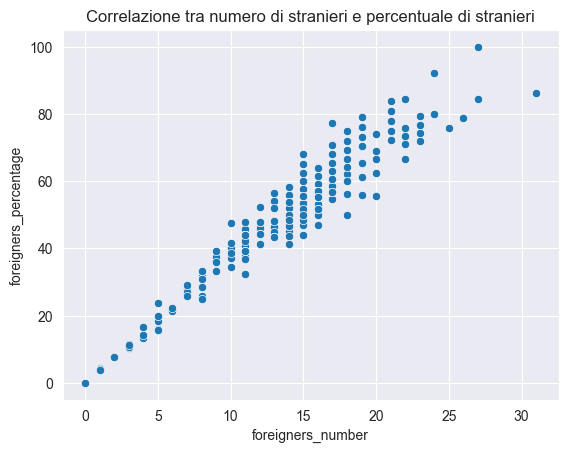

In [24]:
sns.scatterplot(data=current_teams, x='foreigners_number', y='foreigners_percentage')
plt.title("Correlazione tra numero di stranieri e percentuale di stranieri")
plt.show()

In [25]:
current_teams[['national_team_players','total_market_value_mln']].corr()

# c'è una buona correlazione, probabilmente perchè giocatori più forti, quindi convocati dalle loro nazionali, giocano in squadre più forti, quindi con un VDM maggiore

,national_team_players,total_market_value_mln
national_team_players,1.000000,0.790075
total_market_value_mln,0.790075,1.000000


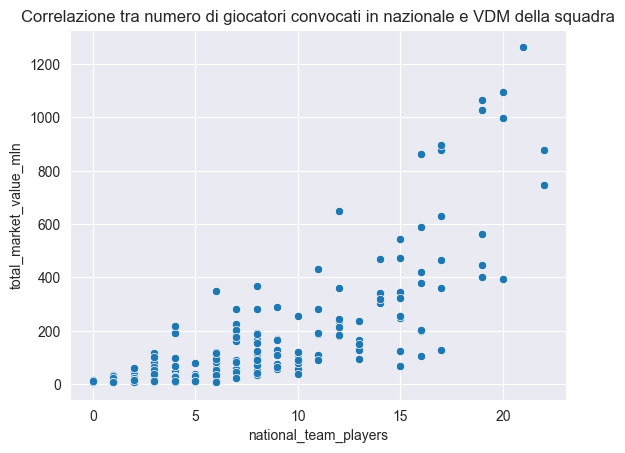

In [26]:
sns.scatterplot(data=current_teams, x='national_team_players', y='total_market_value_mln')
plt.title("Correlazione tra numero di giocatori convocati in nazionale e VDM della squadra")
plt.show()

In [27]:
current_teams['league_id'].value_counts()

league_id
IT1     20
TR1     20
GB1     20
ES1     20
PO1     18
L1      18
FR1     18
NL1     18
BE1     16
RU1     16
UKR1    16
GR1     14
DK1     12
SC1     12
Name: count, dtype: int64

# Saving processed data to feather file

In [28]:
clubs_df.to_feather('../cleaned_data/clubs.feather')